In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x_train=pd.read_csv(r"C:\Users\Pavithran\Downloads\Titanic\x_train.csv")

y_train=pd.read_excel(r"C:\Users\Pavithran\Downloads\Titanic\y_train.xlsx")


In [3]:
x_train=x_train.values
y_train=y_train.values

In [4]:
x_train=x_train.T
y_train=y_train.reshape(1,x_train.shape[1])
X_min = x_train.min(axis=0)
X_max = x_train.max(axis=0)
x_train = (x_train - X_min) / (X_max - X_min)
print(x_train)
print(y_train)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.33333333 1.         0.         ... 0.33333333 0.         0.        ]
 [0.         0.         0.         ... 0.66666667 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.33333333]
 [0.33333333 0.         0.33333333 ... 0.33333333 0.         0.        ]]
[[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0
  1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 

In [5]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)

x_train shape: (5, 891)
y_train shape: (1, 891)


In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def model(x,y,alpha,iter):
    m=x.shape[1]
    n=x.shape[0]

    w=np.zeros((n,1))
    b=0
    cost_list=[]
    for i in range(iter):
        z=np.dot(w.T,x)+b
        y_prediction=sigmoid(z)
        cost=(-1/m)*np.sum((y*np.log(y_prediction))+ ((1-y)*np.log(1-y_prediction)))
        cost_list.append(cost)
        if (i%(iter/10)==0 ):
            
            print("cost at ",i," is:",cost)

        dw = (1/m) * np.dot(x, (y_prediction - y).T)
        db=(1/m)*np.sum(y_prediction-y)
        w=w-alpha*dw
        b=b-alpha*db
    return w,b,cost_list

In [8]:
w,b,cost_lis=model(x_train,y_train,alpha=0.005,iter=100000)
print("W:",w," B:",b)

cost at  0  is: 0.6931471805599454
cost at  10000  is: 0.3455964420110619
cost at  20000  is: 0.28423442670241866
cost at  30000  is: 0.24507578705991442
cost at  40000  is: 0.21681514151050243
cost at  50000  is: 0.1950014372990741
cost at  60000  is: 0.17743108931121593
cost at  70000  is: 0.16285837785005453
cost at  80000  is: 0.15051339747773915
cost at  90000  is: 0.13988775190917946
W: [[  1.36297094]
 [  0.22671122]
 [  0.66438669]
 [ -4.71846418]
 [-10.63149902]]  B: -0.6623901416233714


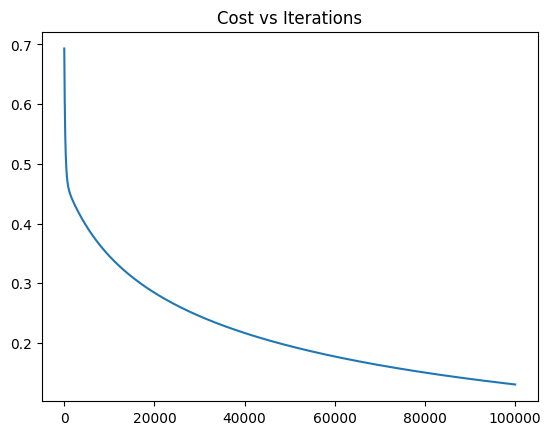

In [9]:

plt.plot(np.arange(100000),cost_lis)
plt.title("Cost vs Iterations")
plt.show()

In [12]:
def accuracy(x,y,w,b):
    z=np.dot(w.T,x)+b
    y_prediction=sigmoid(z)

    y_prediction=y_prediction>0.5
    y_prediction=np.array(y_prediction,dtype='int64')
    acc=(1-np.sum(np.absolute(y_prediction-y))/y.shape[0])*100
    print("The accuracy is :",acc)

In [11]:
accuracy(x_train,y_train,w,b)

The accuracy is : 100.0
